In [19]:
import pandas as pd 
import numpy as np

In [20]:
df = pd.read_csv('../data/stroke.csv')

Initial exploration

In [21]:
df.head(10)

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
5,56669,Male,81.0,0,0,Yes,Private,Urban,186.21,29.0,formerly smoked,1
6,53882,Male,74.0,1,1,Yes,Private,Rural,70.09,27.4,never smoked,1
7,10434,Female,69.0,0,0,No,Private,Urban,94.39,22.8,never smoked,1
8,27419,Female,59.0,0,0,Yes,Private,Rural,76.15,NaN,Unknown,1
9,60491,Female,78.0,0,0,Yes,Private,Urban,58.57,24.2,Unknown,1


In [22]:
# from sklearn.utils import resample

# df_major = df[df.stroke == 0]
# df_minor = df[df.stroke == 1]

# df_major_sampled = resample(df_major, replace=True, n_samples=500, random_state=42)  

# df_balanced = pd.concat([df_minor, df_major_sampled])

# print(df_balanced.stroke.value_counts())

# df = df_balanced

In [23]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                4909 non-null   float64
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 479.2+ KB


In [24]:

df.select_dtypes(object)


,gender,ever_married,work_type,Residence_type,smoking_status
0,Male,Yes,Private,Urban,formerly smoked
1,Female,Yes,Self-employed,Rural,never smoked
2,Male,Yes,Private,Rural,never smoked
3,Female,Yes,Private,Urban,smokes
4,Female,Yes,Self-employed,Rural,never smoked
...,...,...,...,...,...
5105,Female,Yes,Private,Urban,never smoked
5106,Female,Yes,Self-employed,Urban,never smoked
5107,Female,Yes,Self-employed,Rural,never smoked
5108,Male,Yes,Private,Rural,formerly smoked


Pre-Processing

In [25]:
# As we saw the ID column is not in sequence and data is scattered therefore we will drop the column
df.drop('id', axis=1, inplace=True)

In [26]:
# Checking null or missing values 
df.isnull().sum()

gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64

In [27]:
# Dealing with missing values
df['bmi'].fillna(df['bmi'].mean(), inplace=True)

In [28]:
print(df.select_dtypes(include=int).apply(lambda col: col.unique()))

# As we can see the integer type columns only contain 2 unique values therefore these columns 
# dont need preprocessing

   hypertension  heart_disease  stroke
0             0              1       1
1             1              0       0


In [29]:
df.select_dtypes(float)
# These columns should be preprocessed

,age,avg_glucose_level,bmi
0,67.0,228.69,36.600000
1,61.0,202.21,28.893237
2,80.0,105.92,32.500000
3,49.0,171.23,34.400000
4,79.0,174.12,24.000000
...,...,...,...
5105,80.0,83.75,28.893237
5106,81.0,125.20,40.000000
5107,35.0,82.99,30.600000
5108,51.0,166.29,25.600000


In [30]:
# We will check whether these column follow gaussian distribution

from scipy.stats import normaltest

numerical_columns = df.select_dtypes(include=float).columns 
gaussian_cols = []  
non_gaussian_cols = []
for col in numerical_columns:
    stat, p = normaltest(df[col])
    print('Statistics=%.3f, p=%.3f' % (stat, p))
    alpha = 0.05
    if p > alpha:
        gaussian_cols.append(col) 
    else: 
        non_gaussian_cols.append(col)
print(gaussian_cols) 

# All columns are non-gaussian

Statistics=1120.529, p=0.000
Statistics=1328.936, p=0.000
Statistics=1110.537, p=0.000
[]


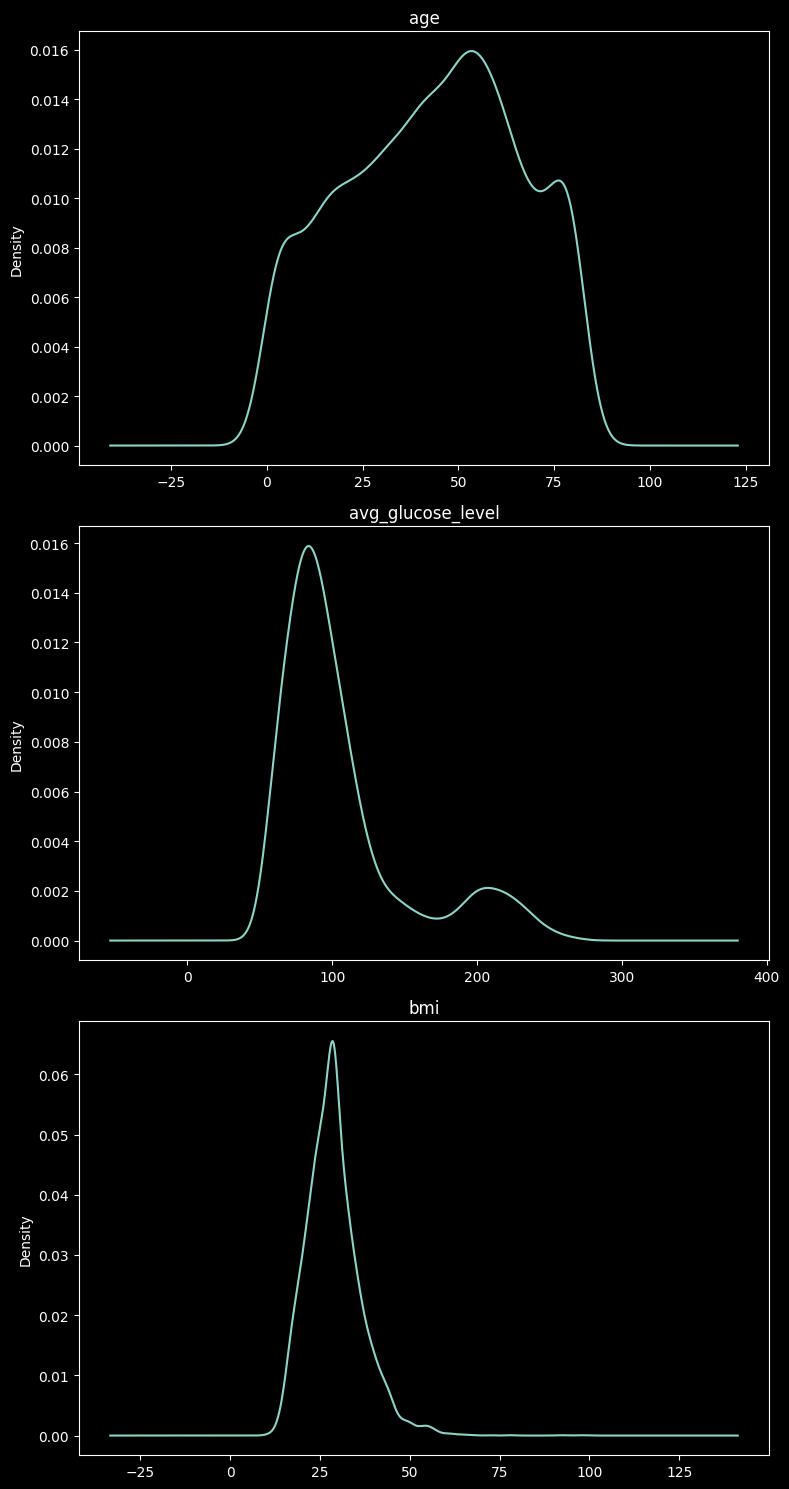

In [31]:
import matplotlib.pyplot as plt

fig, axes = plt.subplots(nrows=3, ncols=1, figsize=(8, 15))
for i, col in enumerate(numerical_columns): 
    # plot title 
    axes[i].set_title(col)
    df[col].plot(kind='density', ax=axes[i])

plt.tight_layout()
plt.show()

In [32]:
import plotly.graph_objects as go

def box_plot(df, col):
    fig = go.Figure(data=[go.Box(y=df[col], boxpoints='outliers', jitter=0.3, pointpos=-1.8)])
    fig.update_layout(
        title='Boxplot of ' + col,
        yaxis_title=col,
        width=500,
        height=500)
    fig.show()

for col in numerical_columns:
    box_plot(df, col)

In [33]:
def capping(df, col):
    percentile25 = df[col].quantile(0.25)
    percentile75 = df[col].quantile(0.75)
    iqr = percentile75 - percentile25
    upper_limit = percentile75 + 1.5 * iqr
    lower_limit = percentile25 - 1.5 * iqr
    df.loc[df[col] > upper_limit, col] = upper_limit
    df.loc[df[col] < lower_limit, col] = lower_limit
    return df 

for col in numerical_columns:
    capped_data = capping(df, col)
capped_data.shape

(5110, 11)

In [34]:
for col in numerical_columns:
    box_plot(capped_data, col)

In [35]:
capped_data.head()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,Male,67.0,0,1,Yes,Private,Urban,169.3575,36.600000,formerly smoked,1
1,Female,61.0,0,0,Yes,Self-employed,Rural,169.3575,28.893237,never smoked,1
2,Male,80.0,0,1,Yes,Private,Rural,105.9200,32.500000,never smoked,1
3,Female,49.0,0,0,Yes,Private,Urban,169.3575,34.400000,smokes,1
4,Female,79.0,1,0,Yes,Self-employed,Rural,169.3575,24.000000,never smoked,1


In [36]:
capped_data.to_csv('../data/stroke_capped.csv', index=False)